In [1]:
import pandas as pd      
import numpy as np           
import matplotlib.pyplot as plt  
import statsmodels.api as sm    
from sklearn.model_selection import train_test_split 
from prophet import Prophet 

In [2]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
from matplotlib import pyplot as plt  

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  
from sklearn.linear_model import LinearRegression  

import warnings  
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\Aman Praskash\OneDrive\Desktop\monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
df.shape

(847, 2)

In [6]:
print(f"Date range of gold prices available from {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [7]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq="ME")  
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [8]:
df['month'] = date  
df.drop('Date', axis=1, inplace=True)  
df = df.set_index('month')  
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


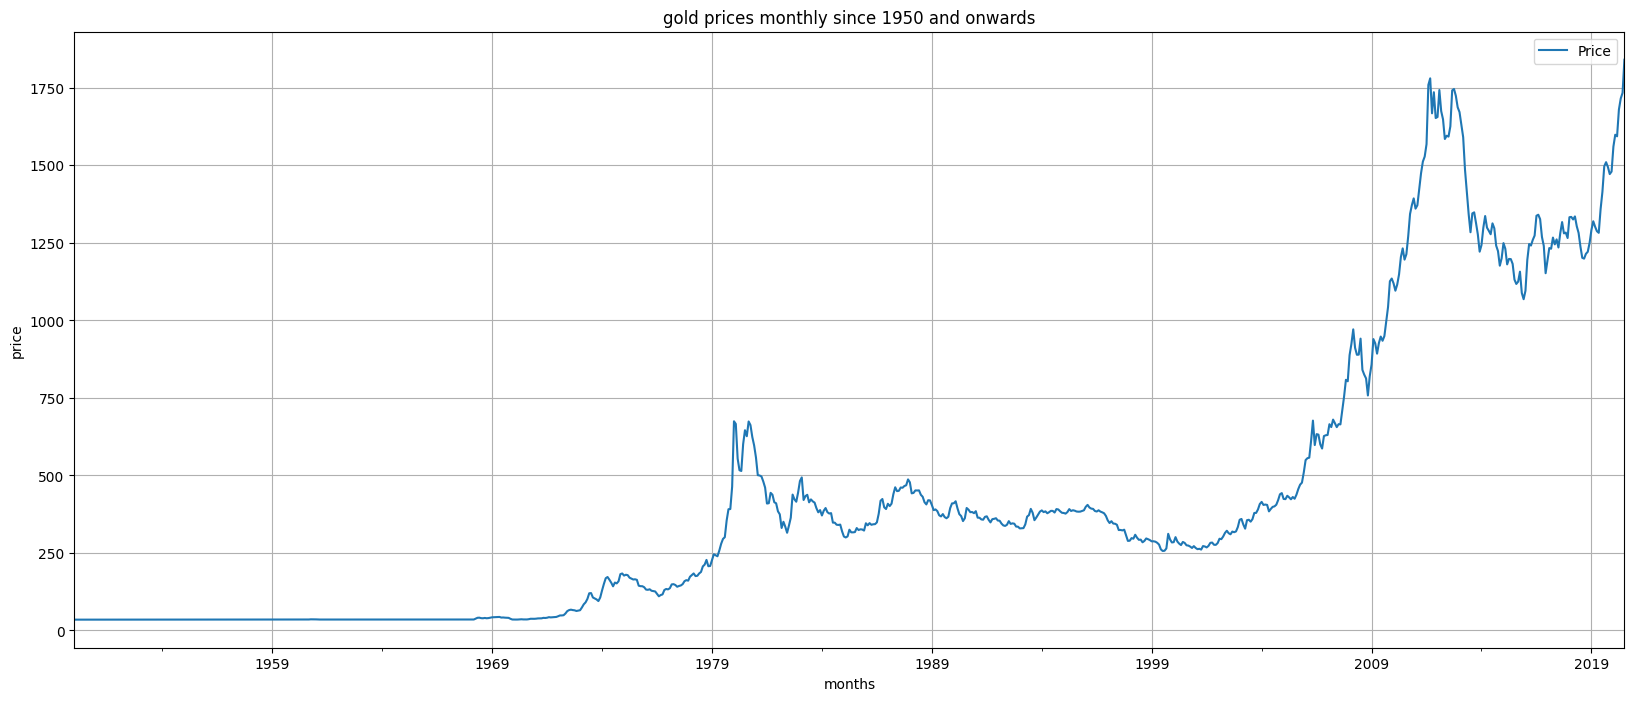

In [9]:
df.plot(figsize=(20,8))  
plt.title("gold prices monthly since 1950 and onwards")  
plt.xlabel("months")  
plt.ylabel("price")  
plt.grid();

In [10]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


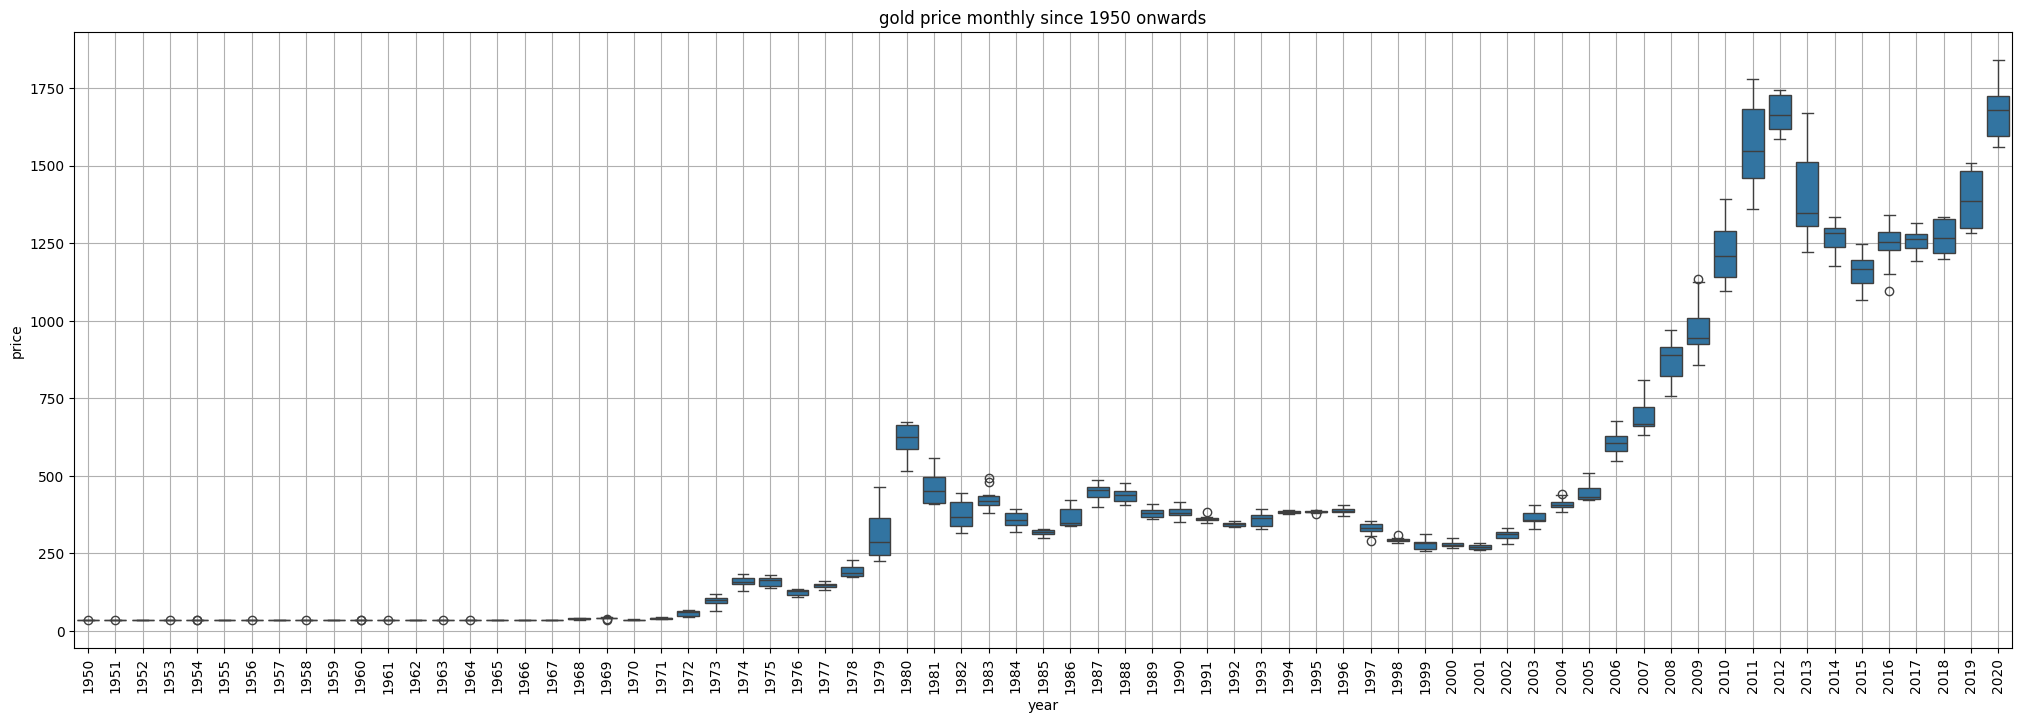

In [11]:
_, ax = plt.subplots(figsize=(25,8))  
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)  
plt.title('gold price monthly since 1950 onwards')  
plt.xlabel('year')  
plt.ylabel('price')  
plt.xticks(rotation = 90)  
plt.grid();

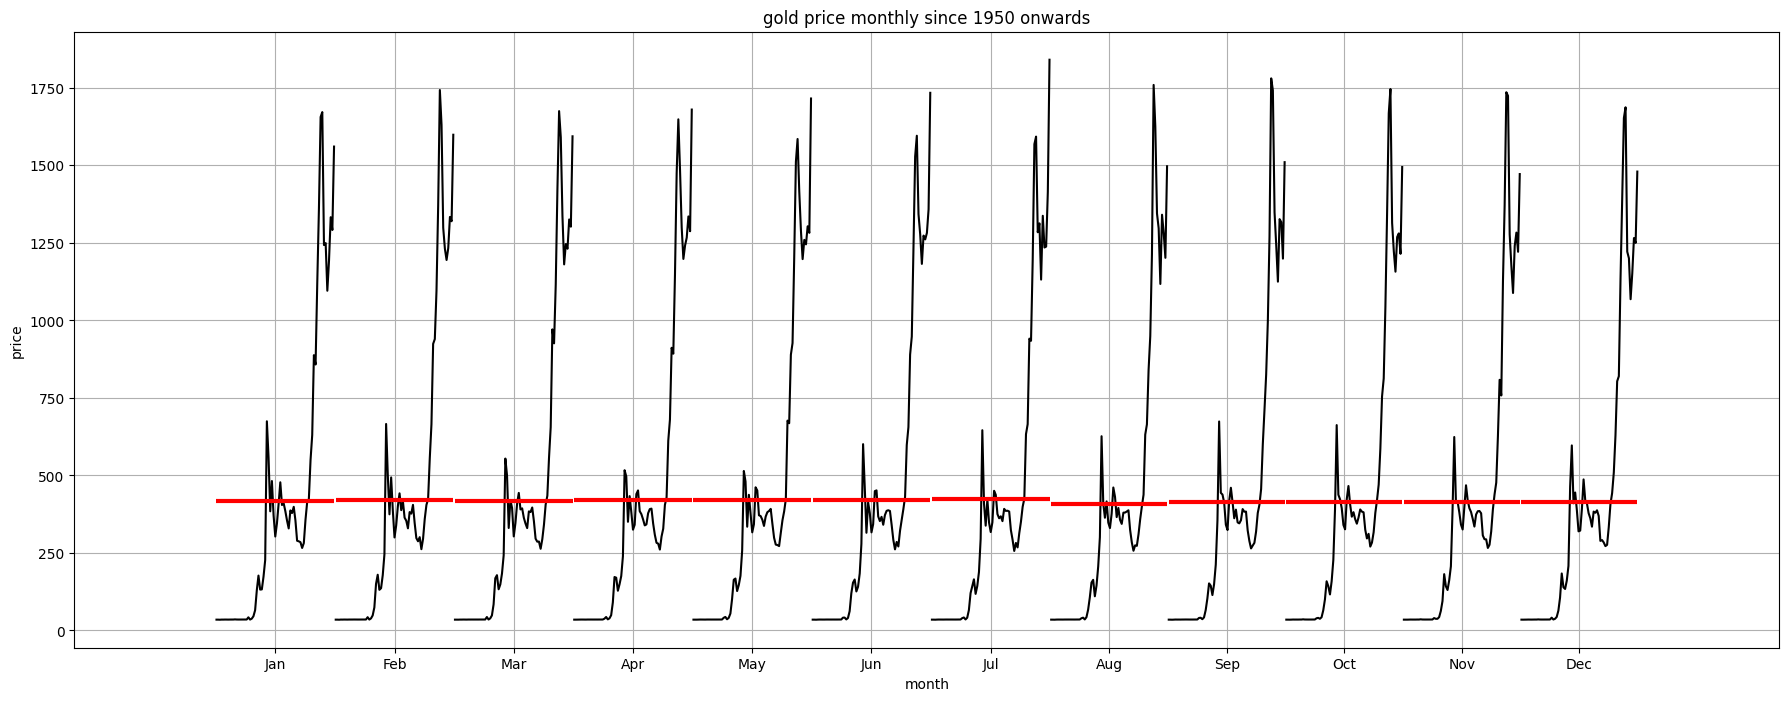

In [13]:
from statsmodels.graphics.tsaplots import month_plot  

fig, ax = plt.subplots(figsize=(22,8))  
month_plot(df, ylabel='gold price', ax=ax)  
plt.title('gold price monthly since 1950 onwards')  
plt.xlabel('month')  
plt.ylabel('price')  
plt.grid();

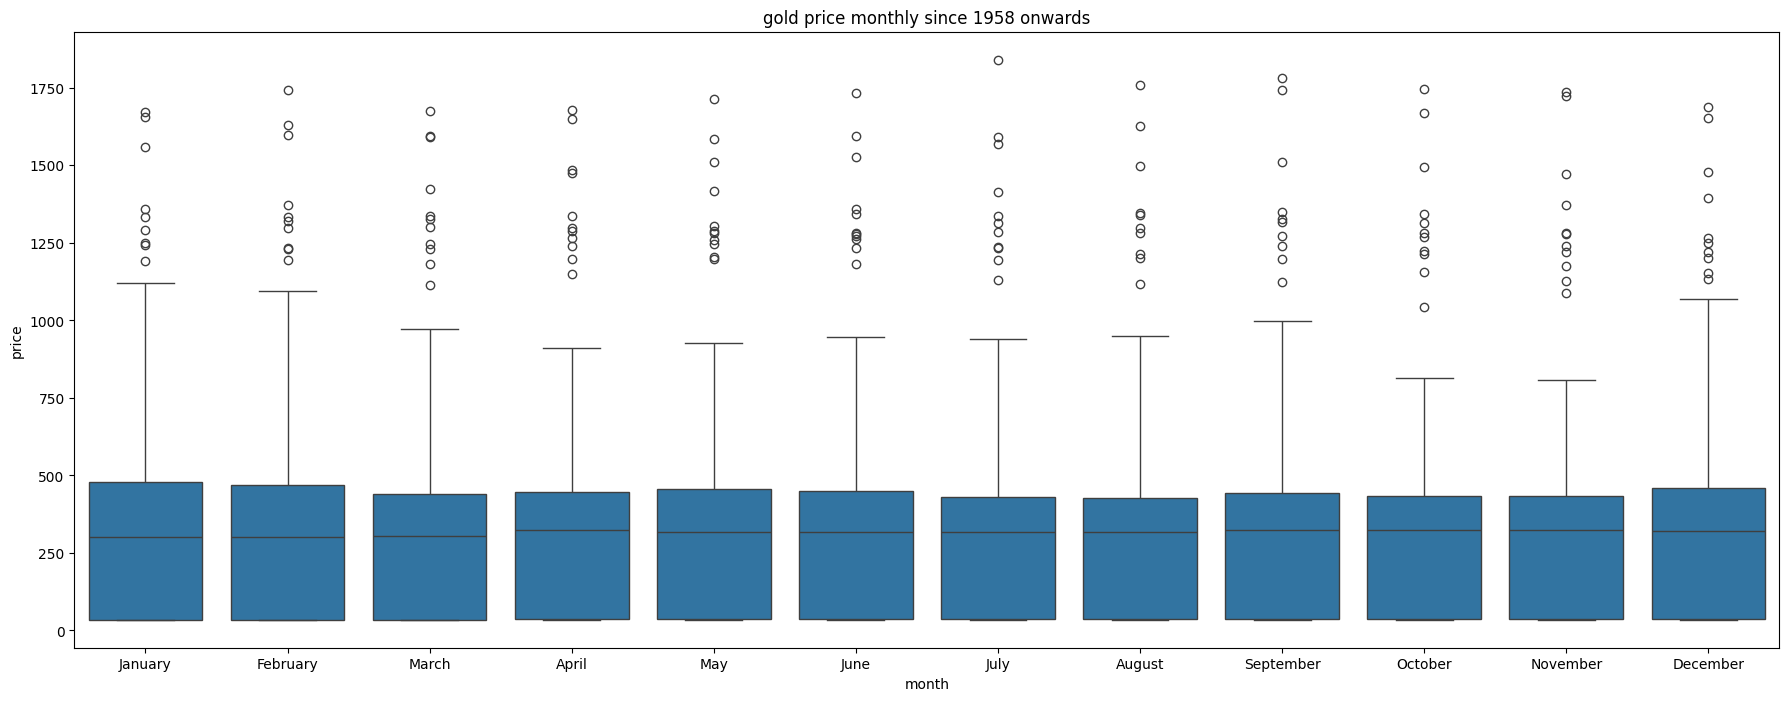

In [14]:
_, ax = plt.subplots(figsize=(22, 8))  
sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)  
plt.title('gold price monthly since 1958 onwards')  
plt.xlabel('month')  
plt.ylabel('price')  
plt.show();

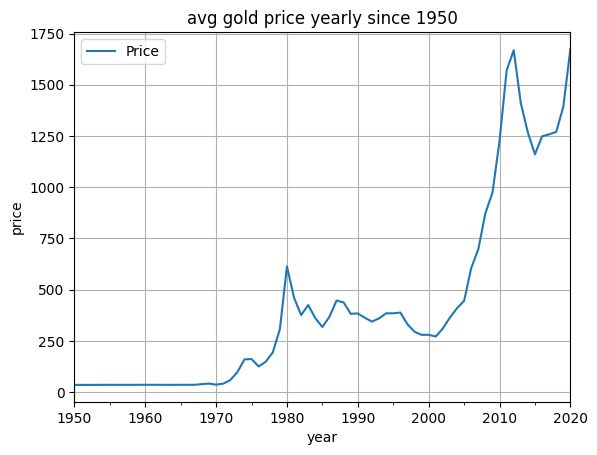

In [15]:
df_yearly_sum = df.resample("A").mean()  
df_yearly_sum.plot();  
plt.title("avg gold price yearly since 1950")  
plt.xlabel("year")  
plt.ylabel("price")  
plt.grid();

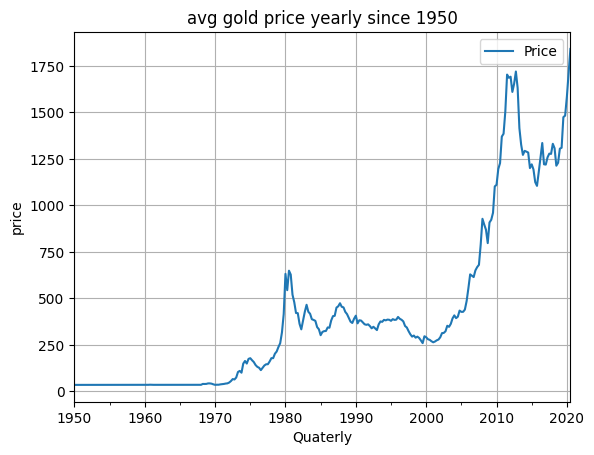

In [17]:
df_Quaterly_sum = df.resample("Q").mean()  
df_Quaterly_sum.plot();  
plt.title("avg gold price yearly since 1950")  
plt.xlabel("Quaterly")  
plt.ylabel("price")  
plt.grid();

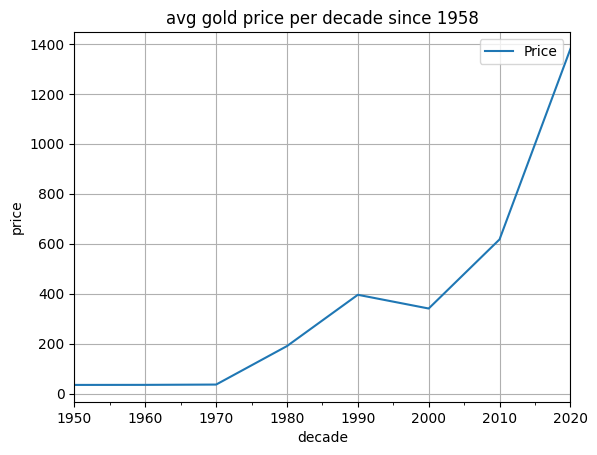

In [18]:
df_decade_sum = df.resample('10Y').mean()  
df_decade_sum.plot();  
plt.title('avg gold price per decade since 1958')  
plt.xlabel('decade')  
plt.ylabel('price')  
plt.grid();

In [19]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})  
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index= True , right_index= True)  
df_1['cov_pct'] = (df_1['Std']/df_1['Mean']*100).round(2)  
df_1.head()

,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


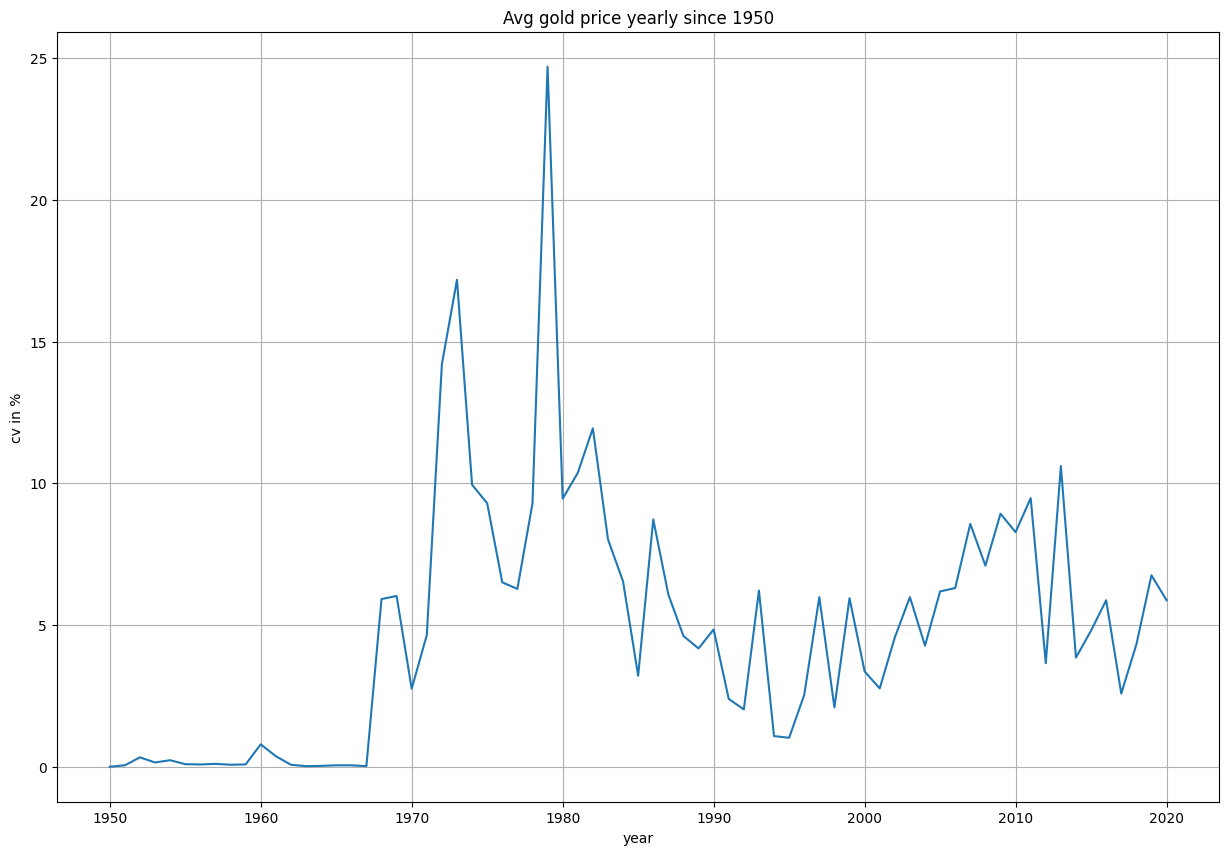

In [20]:
fig, ax = plt.subplots(figsize=(15,10))  
df_1['cov_pct'].plot();  
plt.title('Avg gold price yearly since 1950')  
plt.xlabel('year')  
plt.ylabel('cv in %')  
plt.grid()

In [32]:
train = df[df.index.year <= 2015]  
test = df[df.index.year > 2015] 

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(677, 1)
(170, 1)


In [29]:
train = train.sort_index()
test = test.sort_index()

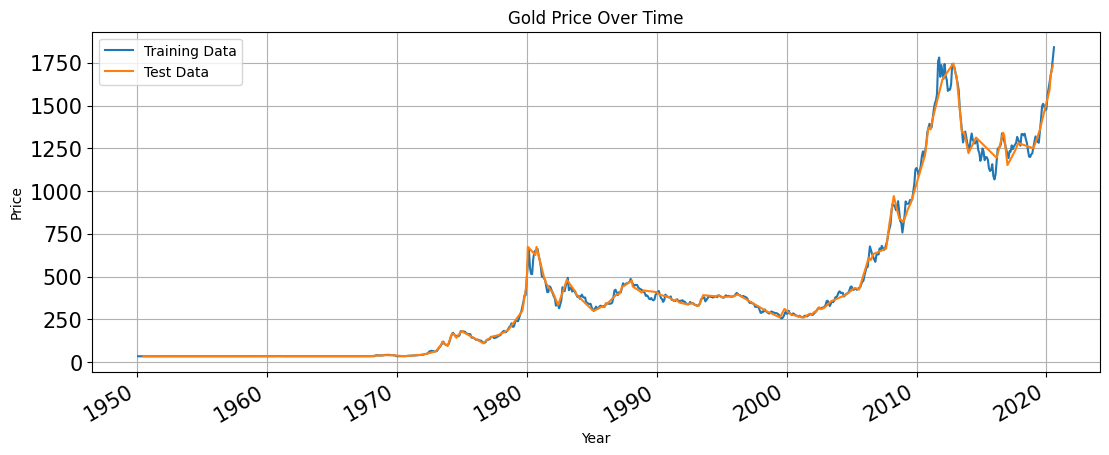

In [30]:
train["Price"].plot(figsize=(13, 5), fontsize=15, label='Training Data')
test["Price"].plot(figsize=(13, 5), fontsize=15, label='Test Data')
plt.grid()
plt.legend()
plt.title('Gold Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


In [33]:
train_time = [i+1 for i in range(len(train))]  
test_time = [i+len(train)+1 for i in range(len(test))]  
len(train_time), len(test_time)

(792, 55)

In [36]:
LR_train = train.copy()  
LR_test = test.copy() 

In [37]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train["Price"].values)

LinearRegression()

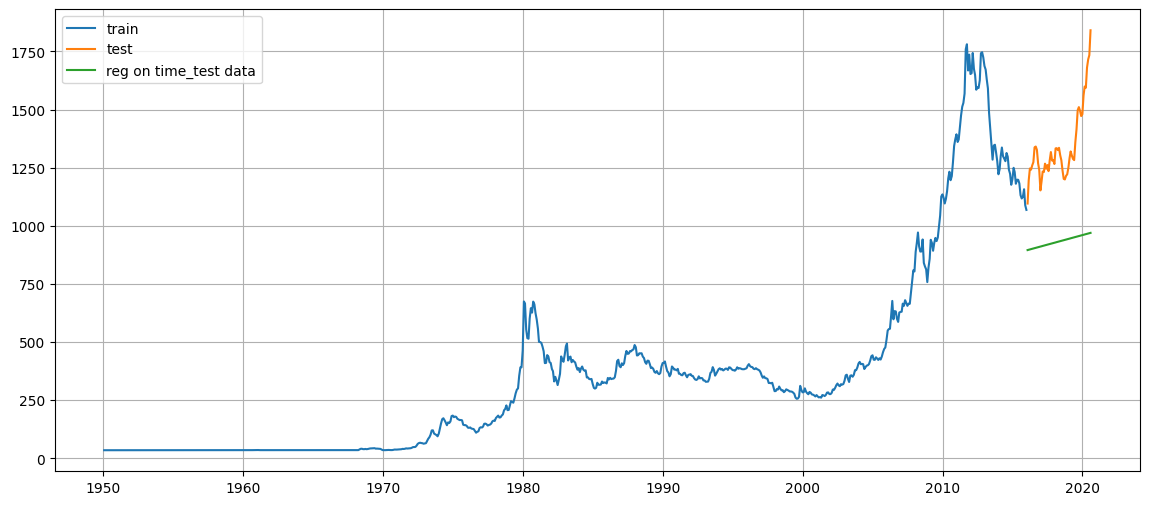

In [40]:
test_predictions_model1 = lr.predict(LR_test[["time"]])  
LR_test["forecast"] = test_predictions_model1  

plt.figure(figsize=(14, 6))  
plt.plot(LR_train['Price'], label='train')  
plt.plot(test['Price'], label='test')  
plt.plot(LR_test['forecast'], label='reg on time_test data')  
plt.legend(loc='best')  
plt.grid()  

In [44]:
def mape(actual, pred):  
    return round((np.mean(abs(actual - pred) / actual)) * 100, 2)

In [45]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)  
print("MAPE is $3.3f" % (mape_model1_test), '%') 

MAPE is $3.3f %


In [46]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=["RegressionOnTime"])  
results  

,Test Mape (%)
RegressionOnTime,29.76


In [47]:
Naive_train = train.copy()  
Naive_test = test.copy()  

In [48]:
Naive_test['naïve'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]  
Naive_test['naïve'].head()  

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naïve, dtype: float64

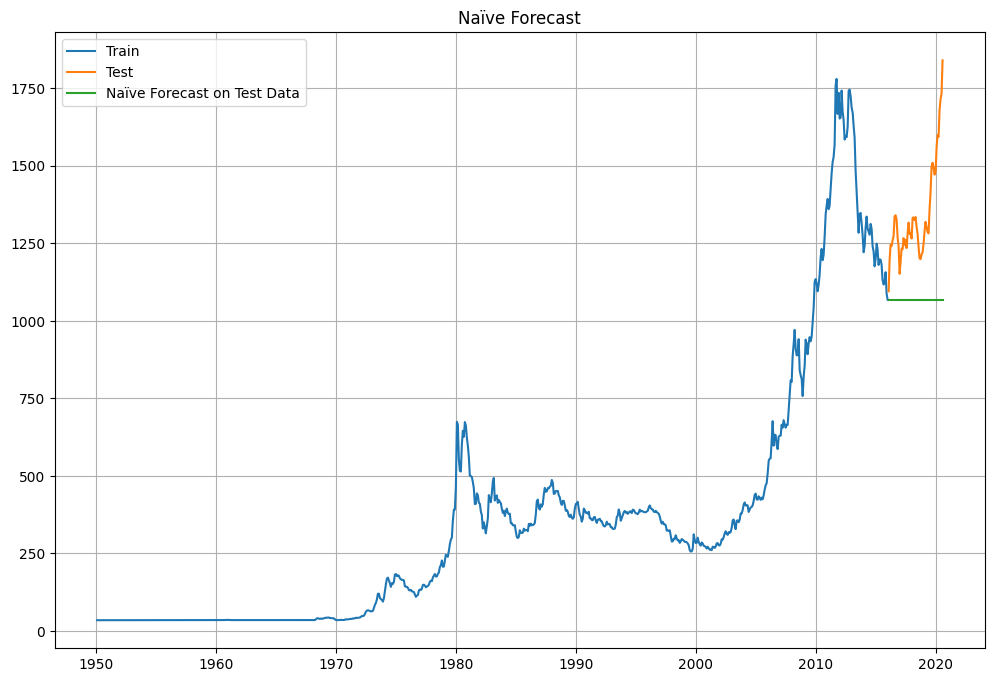

In [49]:
plt.figure(figsize=(12, 8))  
plt.plot(Naive_train['Price'], label='Train')  
plt.plot(test['Price'], label='Test')  
plt.plot(Naive_test['naïve'], label='Naïve Forecast on Test Data')  
plt.legend(loc='best')  
plt.title('Naïve Forecast')  
plt.grid()  

In [50]:
mape_model2_test = mape(test['Price'].values, Naive_test['naïve'].values)  
print("For Naive forecast on the Test Data, MAPE is %.3f" % (mape_model2_test), "%") 

For Naive forecast on the Test Data, MAPE is 19.380 %


In [51]:
resultsDF_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])  
results = pd.concat([results, resultsDF_2])  
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [53]:
final_model = ExponentialSmoothing(df,  
                                    trend='additive',  
                                    seasonal='additive').fit(smoothing_level=0.4,  
                                                              smoothing_trend=0.3,  
                                                              smoothing_seasonal=0.6) 

In [54]:
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)  
print("MAPE:", mape_final_model)  

MAPE: 17.24


In [57]:
predictions = final_model.forecast(steps=len(test))

In [59]:
residuals = LR_test["Price"] - predictions
resid_std = np.std(residuals, ddof=1)

In [61]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid, ddof=1),  
                        'prediction': predictions,  
                        'upper_CI': predictions + 1.96*np.std(final_model.resid, ddof=1)})  

pred_df.head() 

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


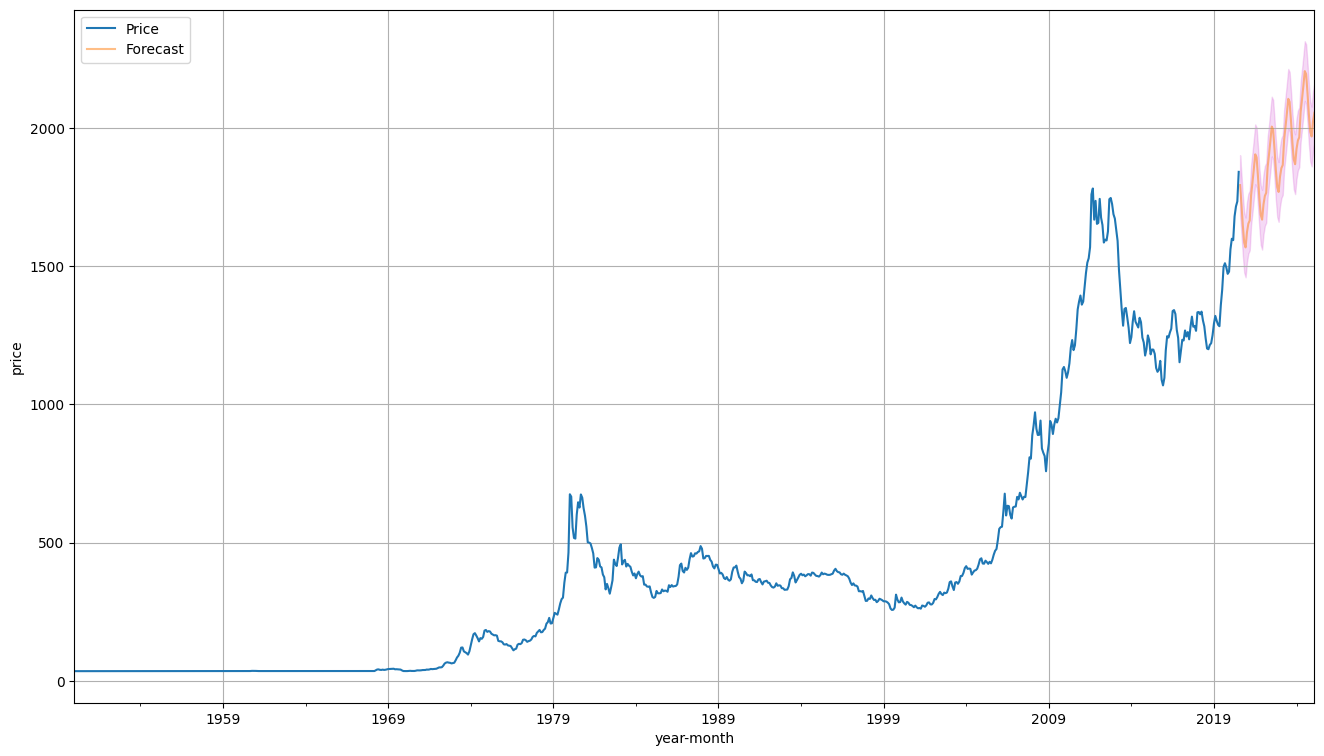

In [62]:
ax = df.plot(label='Actual', figsize=(16, 9))  
pred_df['prediction'].plot(ax=ax, label='Forecast', alpha=0.5)  
ax.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)  

ax.set_xlabel('year-month')  
ax.set_ylabel('price')  
plt.legend(loc='best')  
plt.grid()  
plt.show()